In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import drive 
from scipy.stats import norm

In [0]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


### Referencias utiles
* Pagina 59 a 67 (Prepare the Data for Machine Learning Algorithms) https://github.com/yanshengjia/ml-road/blob/master/resources/Hands%20On%20Machine%20Learning%20with%20Scikit%20Learn%20and%20TensorFlow.pdf
* https://elitedatascience.com/feature-engineering
* https://medium.com/@TheDataGyan/day-8-data-transformation-skewness-normalization-and-much-more-4c144d370e55
* http://onlinestatbook.com/2/transformations/log.html


### Terminos de interaccion

Los modelos lineales no toman en cuenta la interaccion entre 2 posibles variables independientes (no toman en cuenta el efecto combinado de estas sobre la variable dependiente).

En muchos casos es posible obtener un mejor modelo al crear **terminos de interaccion** obtenidos como la multiplicacion de otros terminos.


**Ejemplo 1** : El ejemplo mas comun es en el contexto de prediccion de precio de casas. Si se tiene el ancho y largo de una casa como variables independientes, es posible que la caracteristica que en realidad define el precio de venta sea el area (ancho*largo) y no cada uno de manera invidudual.

**Ejemplo 2**: En el siguiente ejemplo se tiene un modelo de riesgo medico donde X1 es la edad y X2 la presion sanguinea, un aumento en la presion es mas peligroso conforme la edad aumenta. Analicemos que modelo toma en cuenta mejor esto, el primero no tiene termino de interaccion y el segundo si.

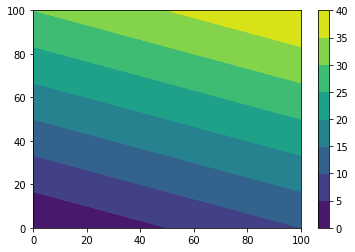

In [0]:
x_list = np.linspace(0,100,100)
y_list = np.linspace(0,100,100)

X1,X2 = np.meshgrid(x_list,y_list)

Y = (0.1*X1) + (0.3*X2)  # y es el riesgo

fig,ax = plt.subplots(1,1)
cp = plt.contourf(X1,X2,Y)
fig.colorbar(cp)
plt.show()

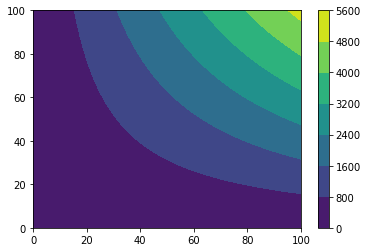

In [0]:
x_list = np.linspace(0,100,100)
y_list = np.linspace(0,100,100)

X1,X2 = np.meshgrid(x_list,y_list)

X3 = X1*X2

Y = (0.1*X1) + (0.3*X2) + (0.5*X3)

fig,ax = plt.subplots(1,1)
cp = plt.contourf(X1,X2,Y)
fig.colorbar(cp)
plt.show()

### Logaritmos para datos sesgados

Muchos algoritmos requieren que los datos se comporten bajo una distribucion normal, algunos no lo requieren pero se ven beneficiados enormemente si este es el caso.

#### Sesgo positivo (hacia la derecha)
http://onlinestatbook.com/2/transformations/log.html

Una transformacion comun cuando se tienen datos con un sesgo positivo (hacia la derecha) es calcular el logaritmo natural.

#### Sesgo negativo (hacia la izquierda)

En estos casos es posible que el logaritmo tambien llegue a ayudar, y se tienen otras opciones: **elevar al cuadrado, tomar la raiz cubica**

In [0]:
X  = pd.read_csv("/content/gdrive/My Drive/statistical_learning1/assets/X_data.csv",index_col = 0)
X.head()

,Age,Systolic_BP,Diastolic_BP,Cholesterol
0,77.196340,85.288742,80.021878,79.957109
1,63.529850,99.379736,84.852361,110.382411
2,69.003986,111.349455,109.850616,100.828246
3,82.638210,95.056128,79.666851,87.066303
4,78.346286,109.154591,90.713220,92.511770


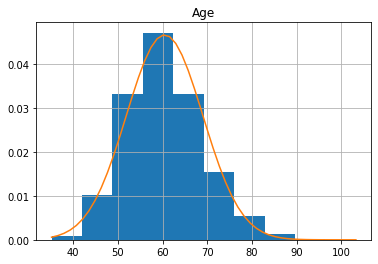

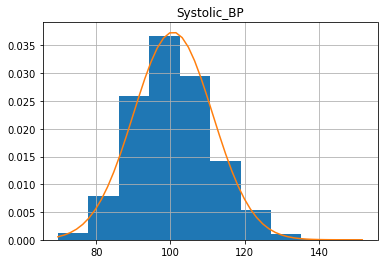

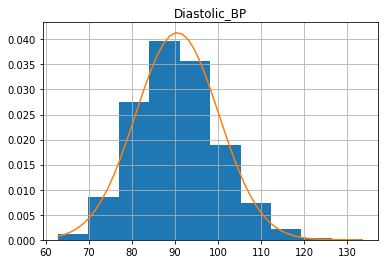

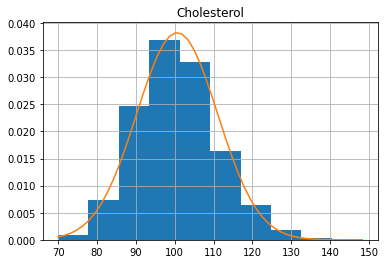

In [0]:
for col in X.columns:
    X.loc[:, col].hist(density = True)
    norm_fit = norm.fit(X.loc[:, col])
    norm_dist_fitted = norm(*norm_fit)
    plt.title(col)

    X_range = X.loc[:, col].min(),X.loc[:, col].max()
    X_values =  np.linspace(*X_range)
    plt.plot(X_values,norm_dist_fitted.pdf(X_values))
    plt.show()

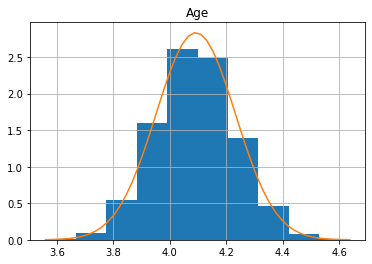

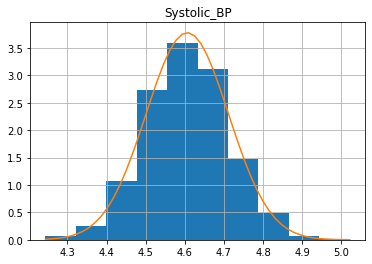

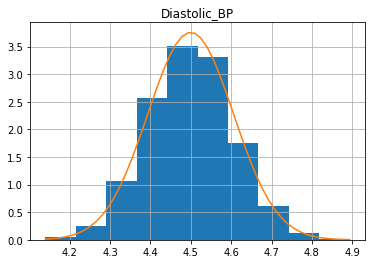

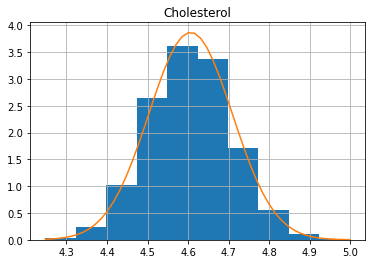

In [0]:
for col in X.columns:
    
    log_X = np.log(X.loc[:, col])
    log_X.hist(density = True)
    norm_fit = norm.fit(log_X)
    norm_dist_fitted = norm(*norm_fit)
    plt.title(col)

    X_range = log_X.min(),log_X.max()
    X_values =  np.linspace(*X_range)
    plt.plot(X_values,norm_dist_fitted.pdf(X_values))
    plt.show()

### **Valores nulos e Imputación**

Un escenario común y que debe tomarse en cuenta es la existencia de valores faltantes o nulos en los datos, comunmente representados con los valores:

*   Null
*   NaN

Un valor nulo no puede ser alimentado a un algoritmo de ML (pensemos por ejemplo en regresión lineal :que resultado esperamos si multiplicamos un nulo por su coeficiente ?) , por lo tanto necesitamos formas de manejer este caso.

#### **Eliminación de observaciones con valores nulos.**

La estrategia mas sencilla (pero posiblemente no la mejor) es simplemente eliminar registros que contengan valores nulos.

El problema es que esto puede crear modelos sesgados debido a que al eliminar registros con valores faltantes en alguna columna, también estamos desechando información que otras columnas que posiblemente no tenían valores nulos nos podrían dar.

#### **Imputación**

Una de las técnicas mas efectivas usada tanto en estadística como en ML  es conocida como **imputación**, esta se basa en una idea sencilla : **Intentar remplazar los valores faltantes con valores factibles basado en el resto de información disponible**

Existen diversos tipos de imputación , vale la pena ejemplificar algunos que ya podemos aplicar con el conocimiento que poseemos hasta el momento:

##### **Imputación basado en estadísticas descriptivas**

Podemos intentar rellenar valores nulos en cierta columna con alguna de las siguientes estadísticas: **promedio de la columna,mediana de la columna,moda de la columna.** 

#### **Imputación basada en estimaciones**

Podemos usar estimaciones y aproximaciones para rellenar valores nulos basados también en ML, por ejemplo: 

para una columna numérica continua con valores faltantes, entrenar un modelo de regresión con esta columna como variable dependiente y usar el resto de columnas como variables independientes. Cuando se necesite rellenar un valor nulo, aproximamos su valor con el modelo dados los valores de las otras columnas.

## Usando feature-eng para crear un modelo exponencial de Covid-19

**Content**

Each row contains report from each region/location for each day
Each column represents the number of cases reported from each country/region


**Acknowledgements**

https://github.com/CSSEGISandData/COVID-19


In [0]:
covid19_data = pd.read_csv('/content/gdrive/My Drive/statistical_learning1/assets/covid_19_clean_complete.csv')
covid19_data["Date"] = pd.to_datetime(covid19_data["Date"],infer_datetime_format = True)
covid19_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [0]:
covid19_data.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date              datetime64[ns]
Confirmed                  int64
Deaths                     int64
Recovered                  int64
dtype: object

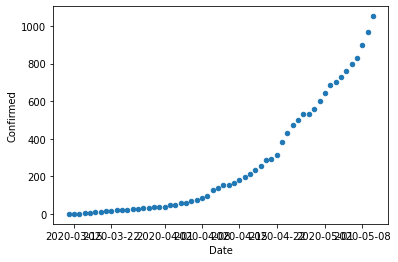

In [0]:
GT_confirmed = covid19_data[(covid19_data["Country/Region"] == 'Guatemala') & (covid19_data["Confirmed"] > 0)].copy()
GT_confirmed.plot.scatter(x = "Date",y="Confirmed")

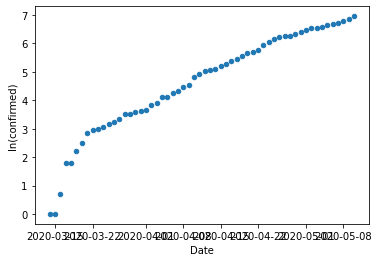

In [0]:
GT_confirmed["ln(confirmed)"] = np.log(GT_confirmed["Confirmed"])
GT_confirmed.plot.scatter(x = "Date",y="ln(confirmed)")


In [0]:
GT_confirmed.head(20)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,ln(confirmed)
13851,NaN,Guatemala,15.7835,-90.2308,2020-03-14,1,0,0,0.000000
14115,NaN,Guatemala,15.7835,-90.2308,2020-03-15,1,0,0,0.000000
14379,NaN,Guatemala,15.7835,-90.2308,2020-03-16,2,1,0,0.693147
14643,NaN,Guatemala,15.7835,-90.2308,2020-03-17,6,1,0,1.791759
14907,NaN,Guatemala,15.7835,-90.2308,2020-03-18,6,1,0,1.791759
15171,NaN,Guatemala,15.7835,-90.2308,2020-03-19,9,1,0,2.197225
15435,NaN,Guatemala,15.7835,-90.2308,2020-03-20,12,1,0,2.484907
15699,NaN,Guatemala,15.7835,-90.2308,2020-03-21,17,1,0,2.833213
15963,NaN,Guatemala,15.7835,-90.2308,2020-03-22,19,1,0,2.944439
16227,NaN,Guatemala,15.7835,-90.2308,2020-03-23,20,1,0,2.995732


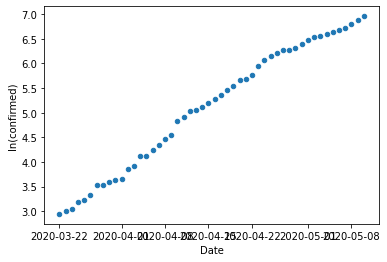

In [0]:
GT_confirmed_post24 = GT_confirmed[GT_confirmed.Date >= '2020-03-22']
GT_confirmed_post24.plot.scatter(x = "Date",y="ln(confirmed)")